
<img style="float: left;;" src='Figures/alinco.png' /></a>
    

# <center> <font color= #000047> Aprendizaje Superviado: Regresión Lineal & Logistica </font> </center>


<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Esta actividad no es obligatoria para entregar. si se entrega antes del domingo 21/09/2025, se considerará un punto para la calificación final.</div>

#### Ejercicio 1: Considere el dataset `Position_Salaries.csv` en la carpeta Data, y realize lo que se pide:

- Crear una regresión polinomial para obtener un modelo polinomial de grado 3. 
- Predecir los siguientes niveles: x_new=[11, 13, 15]
- Graficar los salarios de los valores de x_new

Text(0, 0.5, 'Salary')

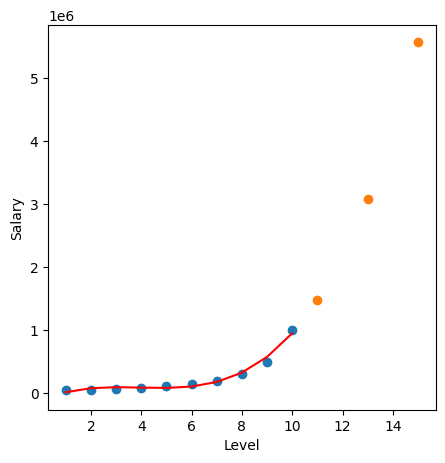

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

datos = pd.read_csv("Position_Salaries.csv")

x = datos['Level'].values.reshape(-1,1)
y = datos['Salary'].values.reshape(-1,1)

poly = PolynomialFeatures(degree=3, include_bias = True)
x_poly = poly.fit_transform(x)

modelo = LinearRegression()
modelo.fit(x_poly, y)

y_pred = modelo.predict(x_poly)
x_new = np.array([[11],[13],[15]])

x_poly_new = poly.fit_transform(x_new)

modelo.predict(x_poly_new)
y_predic_new = modelo.predict(x_poly_new)
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.scatter(x_new.flatten(), y_predic_new.flatten())
plt.plot(x,y_pred,'r')
plt.xlabel('Level')
plt.ylabel('Salary')


In [14]:
datos

datos_predict = pd.DataFrame({
    "Position": ["?"] * len(x_new),   
    "Level": x_new.flatten(),
    "Salary": y_predic_new.flatten().astype(float)
})

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print(f"{"=="*10} Datos Originales{"=="*10}")
print(datos)
print(f"{"=="*10} Datos Predicción {"=="*10}")
print(datos_predict)



==================== Datos Originales====================
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
==================== Datos Predicción ====================
  Position  Level       Salary
0        ?     11 1,475,333.33
1        ?     13 3,074,272.73
2        ?     15 5,570,275.06


#### Ejercicio 2: Considere el dataset `apples_and_oranges.csv` en la carpeta Data, y realize lo que se pide:
- Crear un modelo de regresión logística
- predecir una nueva entrada x_new=[[70.5, 5.1],[65, 4.1]]
- Graficar los nuevos datos con su predicción

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("apples_and_oranges.csv")

x = np.array(data[['Weight', 'Size']])
y = np.array(data['Class'])
le = LabelEncoder()
y_num = le.fit_transform(y)
data.head(10)



,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


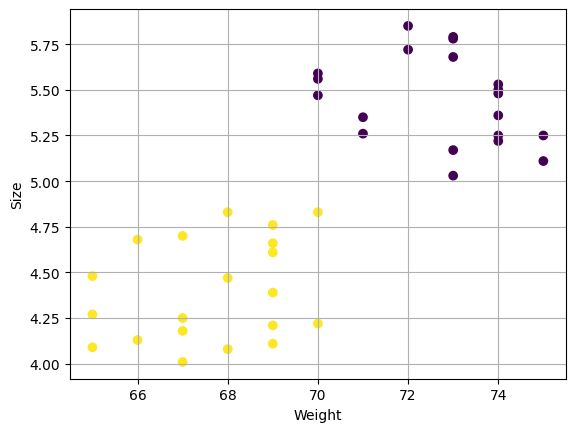

In [16]:
plt.scatter(x[:,0], x[:,1], c = y_num)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.grid(True)
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x, y_num)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
x_new = [[70.5, 5.1], [65, 4.1]]
y_pred = model.predict(x_new)


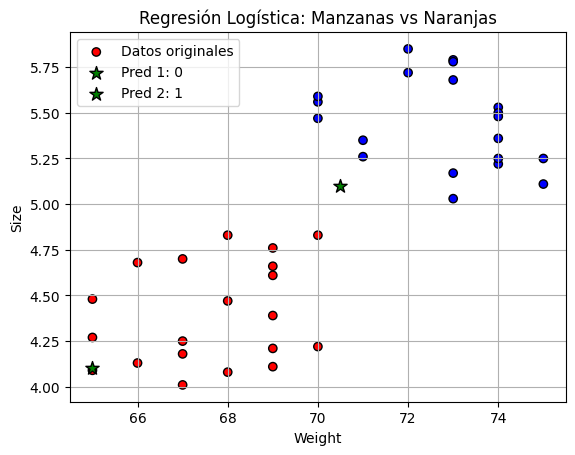

In [19]:
# Puntos originales
plt.scatter(x[:,0], x[:,1], c=y_num, cmap="bwr", edgecolor="k", label="Datos originales")

# Puntos de la predicción
plt.scatter(x_new[0][0], x_new[0][1], c="green", edgecolor="k", s=100, marker="*", 
                label=f"Pred 1: {y_pred[0]}")
plt.scatter(x_new[1][0], x_new[1][1], c="green", edgecolor="k", s=100, marker="*", 
                label=f"Pred 2: {y_pred[1]}")  

plt.xlabel("Weight")
plt.ylabel("Size")
plt.title("Regresión Logística: Manzanas vs Naranjas")
plt.legend()
plt.grid(True)
plt.show()



In [20]:
data_predict = pd.DataFrame({
    "Weight": [row[0] for row in x_new],
    "Size": [row[1] for row in x_new],
    "Class": y_pred
})
data_predict["Class"] = le.inverse_transform(y_pred)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print(f"{"=="*10} Datos Originales{"=="*10}")
print(data.head(10))
print(f"{"=="*10} Datos Predicción {"=="*10}")
print(data_predict)



==================== Datos Originales====================
   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange
5      73  5.68   apple
6      70  5.56   apple
7      75  5.11   apple
8      74  5.36   apple
9      65  4.27  orange
==================== Datos Predicción ====================
   Weight  Size   Class
0   70.50  5.10   apple
1   65.00  4.10  orange
